In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
WT_09_lbl, WT_09_rtot, WT_09_lig, WT_09_sat = prep.datprep('Data/EGFR_WT_09_Sat.csv','Data/EGFR_WT_09_Rtot.csv')

hootie hoo! the indices match!


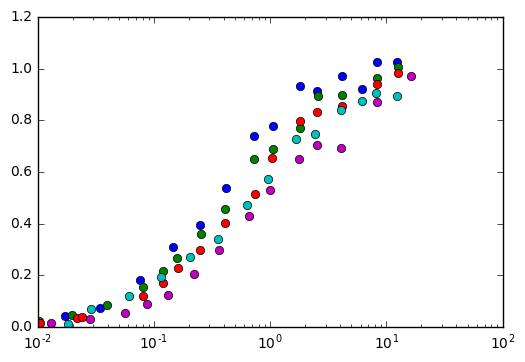

In [3]:
semlog(WT_09_lig,WT_09_sat)

In [23]:
k11r = np.clip(np.random.normal(4.2,0.42,10000),0.0001,np.inf)
k21r = np.clip(np.random.normal(2.0,0.2,10000),0.0001,np.inf)
k22r = np.clip(np.random.normal(0.19,0.07,10000),0.0001,np.inf)
l20r = np.clip(np.random.normal(860.,300.,10000),0.0001,np.inf)

In [24]:
parmset = np.stack([k11r,k21r,k22r,l20r],1)

In [25]:
WT_09_rtot

array([ 0.0005889,  0.002544 ,  0.00643  ,  0.01263  ,  0.05509  ])

In [26]:
rtot_guess = np.array([0.001,0.002,0.005,0.01,0.03])

In [27]:
bounds1 = tuple(0.0 for i in range(5)),tuple(1.0 for i in range(5))

In [28]:
res = [optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_09_lig,WT_09_sat,i)).x for i in parmset]

In [29]:
resar = np.array(res)

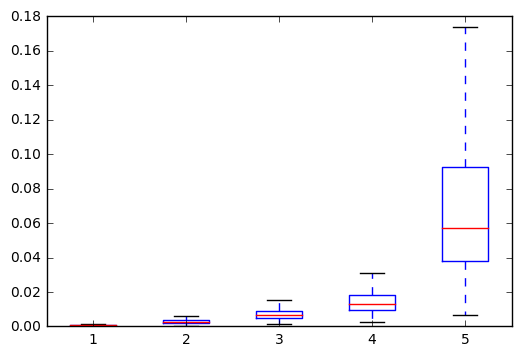

In [30]:
boxplot = plt.boxplot(resar, showfliers=False)

In [31]:
np.median(resar,axis=0)

array([ 0.00060674,  0.00259902,  0.00655987,  0.01284353,  0.05729213])

In [32]:
WT_09_Parms = np.array([4.2,2.0,0.19,860.])

In [33]:
res2 = optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_09_lig,WT_09_sat,WT_09_Parms))

In [34]:
res2.x

array([ 0.00058893,  0.00254376,  0.00642976,  0.01263456,  0.05509229])

In [16]:
import corner

In [17]:
samps = np.stack([parmset[:,3],resar[:,4]],1)

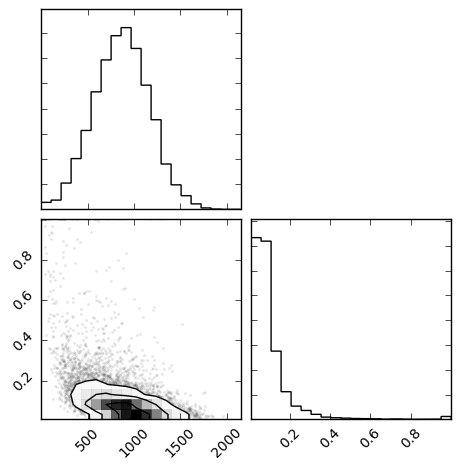

In [18]:
a = corner.corner(samps)

In [19]:
newset = np.insert(parmset,4,resar[:,4],axis=1)

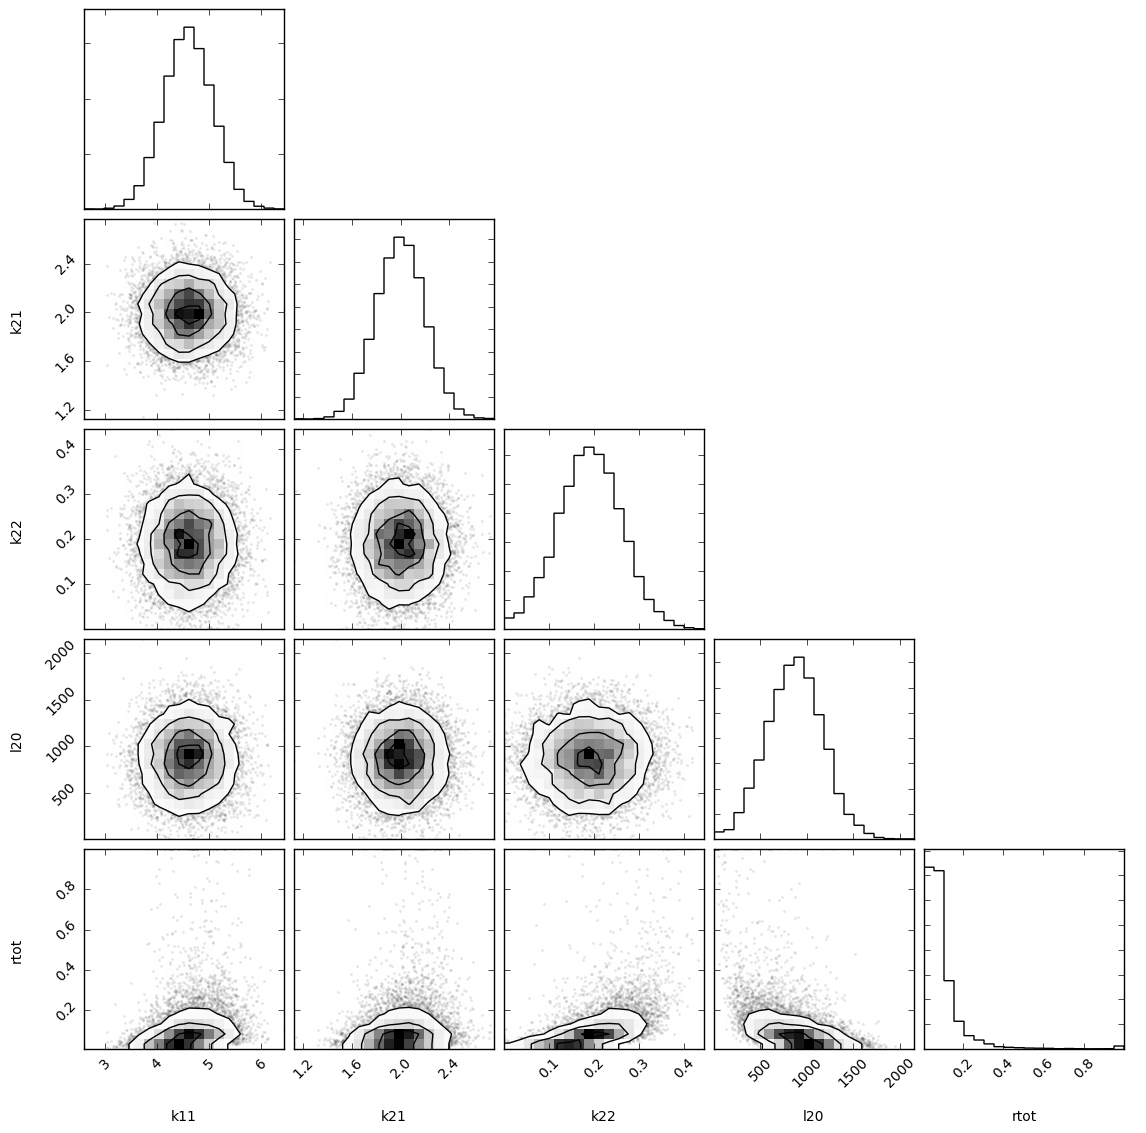

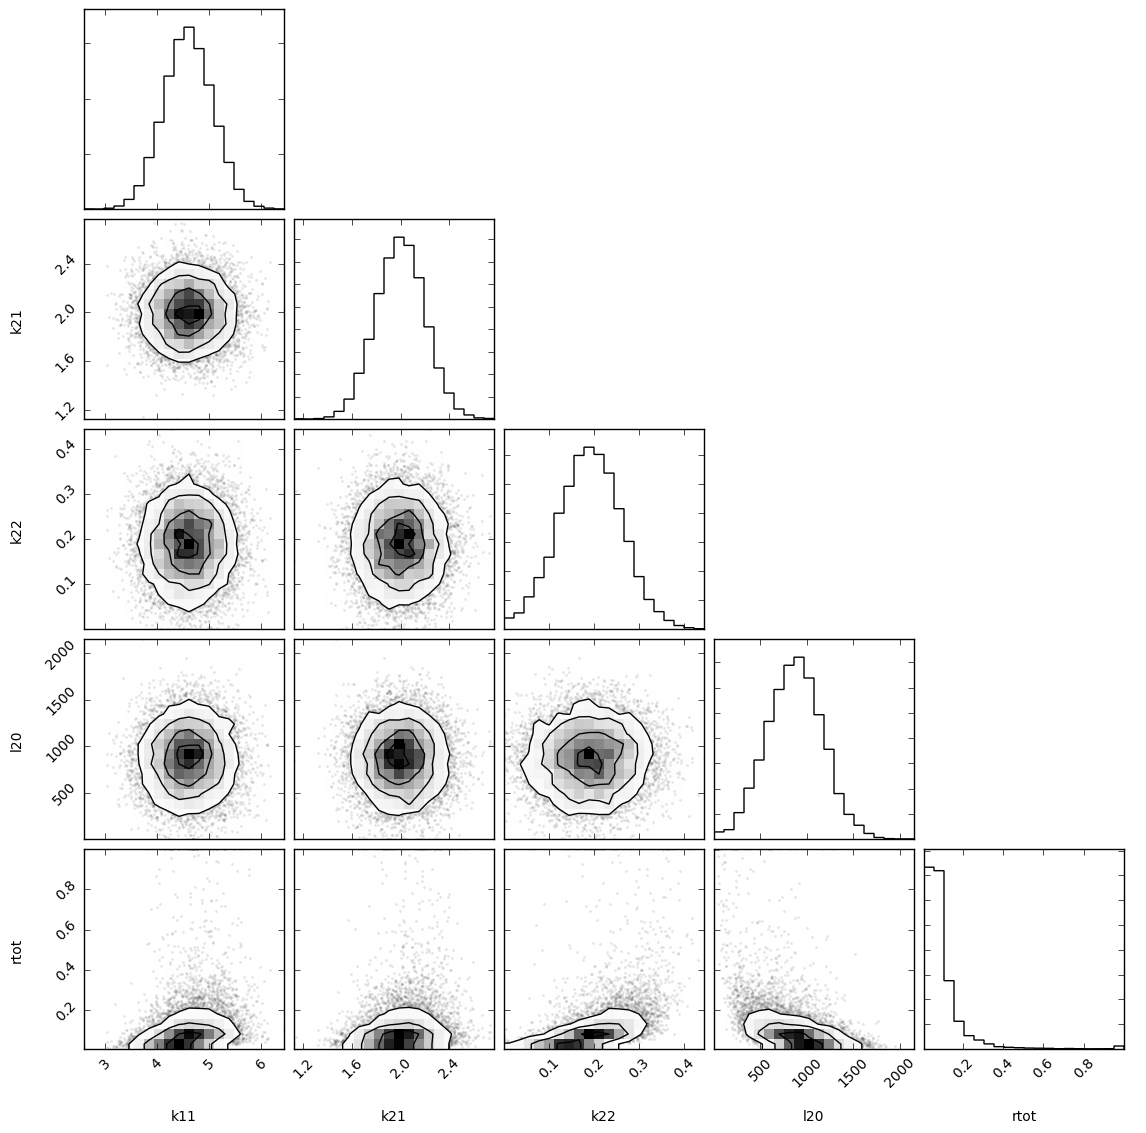

In [20]:
corner.corner(newset,labels=['k11','k21','k22','l20','rtot'])

In [97]:
WT_09_lbl

['20k', '46k', '187k', '256k', '1200k']

In [98]:
nominals = np.array([20,46,187,256,1200])

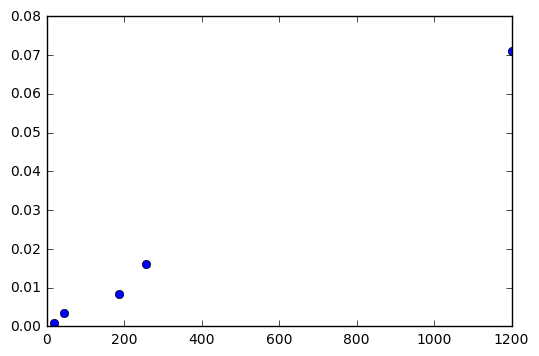

In [102]:
plt.plot(nominals,np.median(resar,axis=0),'o')

In [101]:
np.median(resar,axis=0)

array([ 0.00091035,  0.00344269,  0.00835584,  0.01621863,  0.07108079])

In [107]:
estimated = np.array([
0.0005889,
0.002544,
0.00643,
0.01263,
0.05509])

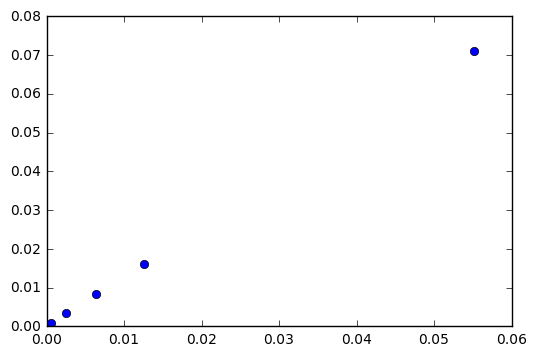

In [108]:
plt.plot(estimated,np.median(resar,axis=0),'o')

In [109]:
res2.x

array([ 0.00090472,  0.00342469,  0.00832071,  0.01607519,  0.0689238 ])

In [110]:
WT_09_rtot

array([ 0.0005889,  0.002544 ,  0.00643  ,  0.01263  ,  0.05509  ])

In [112]:
nominals

array([  20,   46,  187,  256, 1200])

In [113]:
r20k_fits = resar[:,0]

In [115]:
r20k_fits = resar[:,0]
r46k_fits = resar[:,1]
r187k_fits = resar[:,2]
r256k_fits = resar[:,3]
r1200k_fits = resar[:,4]

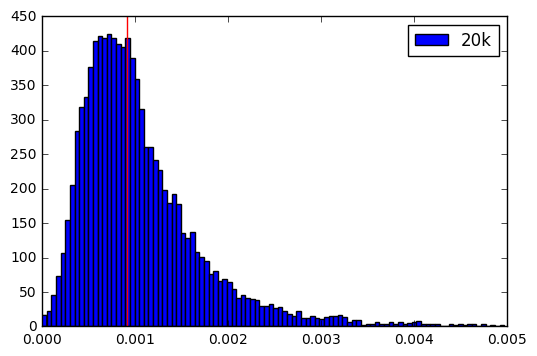

In [138]:
i=0
his = plt.hist(resar[:,i][(resar[:,i]< 0.005)],bins=100,label=WT_09_lbl[i])
plt.axvline(np.median(resar,axis=0)[i],color='red')
leg = plt.legend()

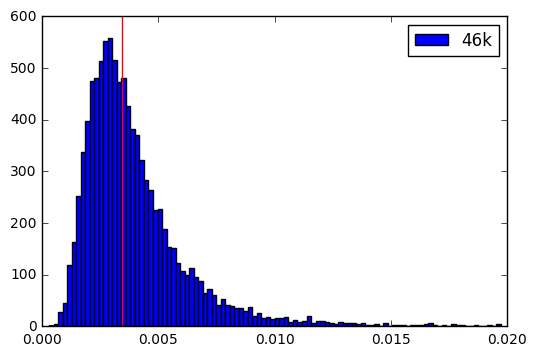

In [139]:
i=1
his = plt.hist(resar[:,i][(resar[:,i]< 0.02)],bins=100,label=WT_09_lbl[i])
plt.axvline(np.median(resar,axis=0)[i],color='red')
leg = plt.legend()

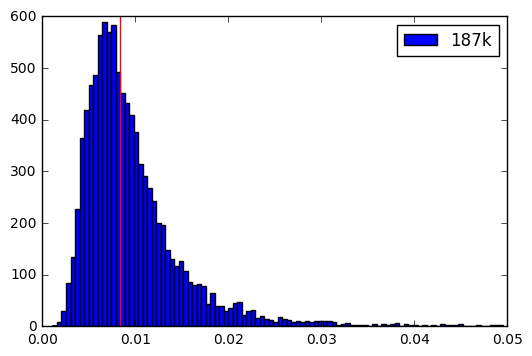

In [140]:
i=2
his = plt.hist(resar[:,i][(resar[:,i]< 0.05)],bins=100,label=WT_09_lbl[i])
plt.axvline(np.median(resar,axis=0)[i],color='red')
leg = plt.legend()

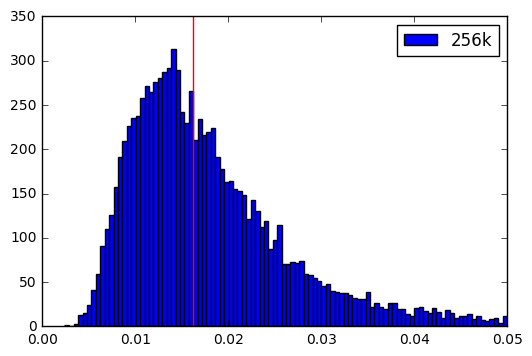

In [141]:
i=3
his = plt.hist(resar[:,i][(resar[:,i]< 0.05)],bins=100,label=WT_09_lbl[i])
plt.axvline(np.median(resar,axis=0)[i],color='red')
leg = plt.legend()

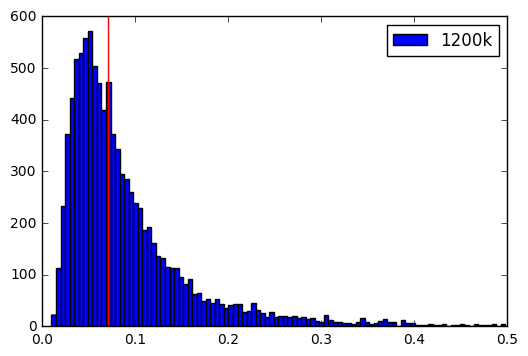

In [142]:
i=4
his = plt.hist(resar[:,i][(resar[:,i]< 0.5)],bins=100,label=WT_09_lbl[i])
plt.axvline(np.median(resar,axis=0)[i],color='red')
leg = plt.legend()

In [147]:
(resar[:,4] > 0.225).sum()

729

In [148]:
lognorm = np.log(resar[:,4])

(array([   40.,   358.,  1381.,  2529.,  2587.,  1738.,   799.,   349.,
          108.,   111.]),
 array([ -4.60130608e+00,  -4.14117547e+00,  -3.68104486e+00,
         -3.22091426e+00,  -2.76078365e+00,  -2.30065304e+00,
         -1.84052243e+00,  -1.38039182e+00,  -9.20261216e-01,
         -4.60130608e-01,  -1.11022302e-16]),
 <a list of 10 Patch objects>)

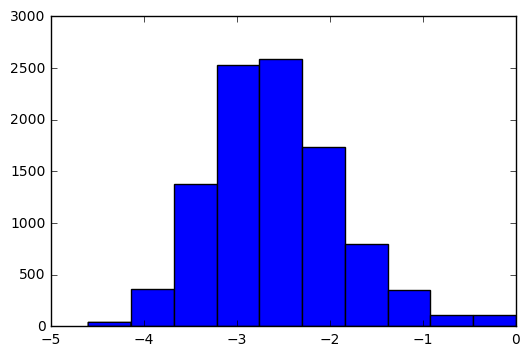

In [149]:
plt.hist(lognorm)

In [151]:
np.exp(np.average(lognorm))

0.075691630449517711

In [152]:
estimated

array([ 0.0005889,  0.002544 ,  0.00643  ,  0.01263  ,  0.05509  ])

In [153]:
res2.x

array([ 0.00090472,  0.00342469,  0.00832071,  0.01607519,  0.0689238 ])

In [154]:
np.median(resar[:,4])

0.071080790081683193